In [1]:
import math
import numpy as np
import random as rand
from numba import jit,int64,float64
import matplotlib.pyplot as plt
%matplotlib inline

#To increase cell width:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

#Color-blind friendly colors to plot:
CB_colors = ['#377eb8', '#ff7f00', '#4daf4a','#f781bf', '#a65628', '#984ea3','#999999', '#e41a1c', '#dede00']

#Running the script with parameter definitions and functions:
%run populations_functions.py

K = 1; 0.5*dg/dt = 1250.0
D = 50.0; 0.5*dg**2/dt = 500.00000000000006


In [2]:
#Plotting unreg. and reg. initial distributions against noise. First, the noises:
alphas_arr = np.array([0.2,1,5])

#The initial distributions:
p0_unreg_alphas = np.zeros((len(alphas_arr),len(g)))
p0_reg_alphas = np.zeros((len(alphas_arr),len(g)))

#Choosing a sugar level and finding the regulation peak:
sug_alphas = 160
fit = fitness(g,sug_alphas,delta)
g_reg_alphas = g[np.argmax(fit)]
print(f"g_reg={round(g_reg_alphas,2)}")

#Varying noise:
for alpha_idx in range(len(alphas_arr)):
    alpha = alphas_arr[alpha_idx]
    #Unregulated:
    p0_unreg_alphas[alpha_idx] = Gaussian(g,g_peak,np.maximum(np.sqrt(alpha*g_peak),1))
    p0_unreg_alphas[alpha_idx] = p0_unreg_alphas[alpha_idx]/np.trapz(p0_unreg_alphas[alpha_idx],dx=dg)
    #Regulated:
    p0_reg_alphas[alpha_idx] = Gaussian(g,g_reg_alphas,np.maximum(np.sqrt(alpha*g_reg_alphas),1))
    p0_reg_alphas[alpha_idx] = p0_reg_alphas[alpha_idx]/np.trapz(p0_reg_alphas[alpha_idx],dx=dg)

g_reg=64.4


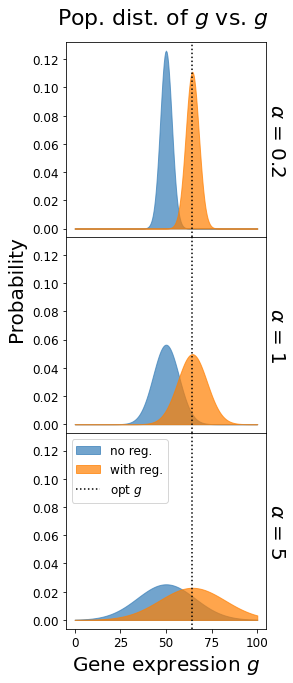

In [3]:
fig,ax = plt.subplots(3,1,sharex=True,sharey=True,figsize=[3.6,10.8])

ax[0].fill_between(g,y1=p0_unreg_alphas[0],y2=0,color=CB_colors[0],alpha=0.7)
ax[0].fill_between(g,y1=p0_reg_alphas[0],y2=0,color=CB_colors[1],alpha=0.7)
ax[0].axvline(g_reg_alphas,color='k',ls=':')
ax[0].tick_params(axis='both', which='major', labelsize=12)
ax[0].tick_params(axis='both', which='minor', labelsize=10)
ax[0].text(1.05,0.5,r'$\alpha$ = 0.2',va='center',ha='center',rotation=270,transform=ax[0].transAxes,fontsize=20)

ax[1].fill_between(g,y1=p0_unreg_alphas[1],y2=0,color=CB_colors[0],alpha=0.7)
ax[1].fill_between(g,y1=p0_reg_alphas[1],y2=0,color=CB_colors[1],alpha=0.7)
ax[1].axvline(g_reg_alphas,color='k',ls=':')
ax[1].tick_params(axis='both', which='major', labelsize=12)
ax[1].tick_params(axis='both', which='minor', labelsize=10)
ax[1].text(1.05,0.5,r'$\alpha$ = 1',va='center',ha='center',rotation=270,transform=ax[1].transAxes,fontsize=20)

ax[2].fill_between(g,y1=p0_unreg_alphas[2],y2=0,color=CB_colors[0],alpha=0.7,label='no reg.')
ax[2].fill_between(g,y1=p0_reg_alphas[2],y2=0,color=CB_colors[1],alpha=0.7,label='with reg.')
ax[2].axvline(g_reg_alphas,color='k',ls=':',label=r'opt $g$')
ax[2].legend(loc='best',fontsize=12)
ax[2].tick_params(axis='both', which='major', labelsize=12)
ax[2].tick_params(axis='both', which='minor', labelsize=10)
ax[2].set_xlabel(r'Gene expression $g$',fontsize=20)
ax[2].text(1.05,0.5,r'$\alpha$ = 5',va='center',ha='center',rotation=270,transform=ax[2].transAxes,fontsize=20)

fig.text(0.5,0.91,'Pop. dist. of $g$ vs. $g$',va='center',ha='center',fontsize=22)
fig.text(-0.1,0.5,'Probability',rotation='vertical',fontsize=20)

plt.tick_params(axis='both', which='major', labelsize=12)
plt.tick_params(axis='both', which='minor', labelsize=10)

plt.subplots_adjust(hspace=0)

# fig.savefig("2_pop_distributions_vs_alpha.pdf",format="pdf",dpi=2000,bbox_inches="tight",pad_inches=0.05)

In [5]:
#Plotting fitness as a function of s:
sug_arr = np.arange(50,600,0.1)
#Fitnesses for unregulated and regulated, absolute and normalized:
fit_unreg_arr = np.zeros((len(alphas_arr),len(sug_arr)))
fit_unreg_norm_arr = np.zeros((len(alphas_arr),len(sug_arr)))
fit_reg_arr = np.zeros((len(alphas_arr),len(sug_arr)))
fit_reg_norm_arr = np.zeros((len(alphas_arr),len(sug_arr)))
#The maximum and minimum values of fitness for given sugar:
max_fit_sug = np.zeros((len(alphas_arr),len(sug_arr)))
min_fit_sug = np.zeros((len(alphas_arr),len(sug_arr)))

#Varying the noise:
for alpha_idx in range(len(alphas_arr)):
    alpha = alphas_arr[alpha_idx]

    #The unregulated distribution, purely a function of alpha:
    p0_unreg_sug = Gaussian(g,g_peak,np.maximum(np.sqrt(alpha*g_peak),1))
    p0_unreg_sug = p0_unreg_sug/np.trapz(p0_unreg_sug,dx=dg)

    #Calculating fitness for various sugars:
    for sug_idx in range(len(sug_arr)):
        #The sugar
        sug = sug_arr[sug_idx]
        #Fitness and the optimal expression value:
        fit_sug = fitness(g,sug,delta)
        g_reg_sug = g[np.argmax(fit_sug)]
        #The regulated distribution:
        p0_reg_sug = Gaussian(g,g_reg_sug,np.maximum(np.sqrt(alpha*g_reg_sug),1))
        p0_reg_sug = p0_reg_sug/np.trapz(p0_reg_sug,dx=dg)
        #The max, mean fitnesses for given sugar and the dynamic range between them:
        max_fit_sug[alpha_idx,sug_idx] = np.max(fit_sug)
        min_fit_sug[alpha_idx,sug_idx] = np.min(fit_sug)
        fit_range_sug = max_fit_sug[alpha_idx,sug_idx]-min_fit_sug[alpha_idx,sug_idx]
        #Fitness of unregulated and regulated distributions:
        fit_unreg_arr[alpha_idx,sug_idx] = mean_wrt_P(fit_sug,p0_unreg_sug,g)
        fit_unreg_norm_arr[alpha_idx,sug_idx] = (fit_unreg_arr[alpha_idx,sug_idx]-min_fit_sug[alpha_idx,sug_idx])/fit_range_sug
        fit_reg_arr[alpha_idx,sug_idx] = mean_wrt_P(fit_sug,p0_reg_sug,g)
        fit_reg_norm_arr[alpha_idx,sug_idx] = (fit_reg_arr[alpha_idx,sug_idx]-min_fit_sug[alpha_idx,sug_idx])/fit_range_sug

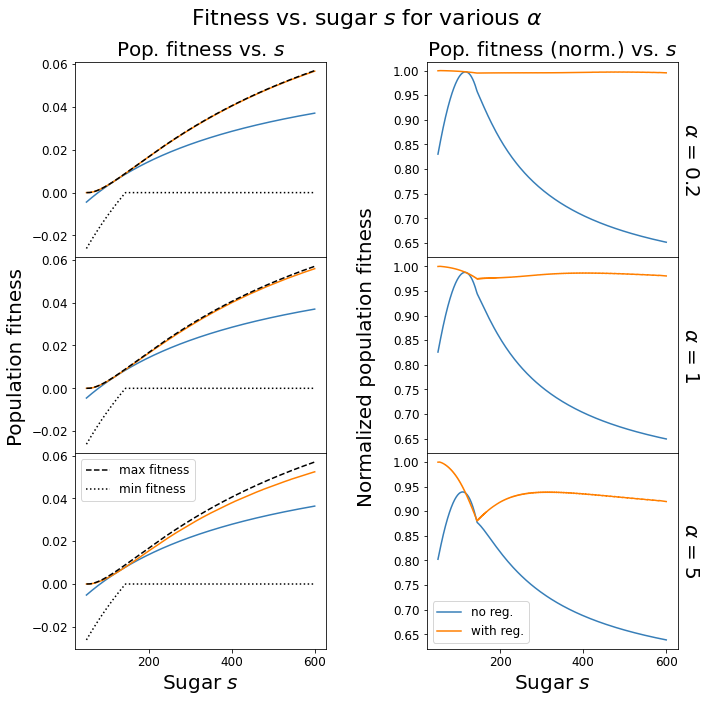

In [6]:
fig,ax = plt.subplots(3,2,sharex=True,sharey='col',figsize=[10.8,10.8])


ax[0,0].plot(sug_arr,fit_unreg_arr[0],color=CB_colors[0])
ax[0,0].plot(sug_arr,fit_reg_arr[0],color=CB_colors[1])
ax[0,0].plot(sug_arr,max_fit_sug[0],'k--')
ax[0,0].plot(sug_arr,min_fit_sug[0],'k:')
ax[0,0].tick_params(axis='both', which='major', labelsize=12)
ax[0,0].tick_params(axis='both', which='minor', labelsize=10)
ax[0,0].set_title(r'Pop. fitness vs. $s$', fontsize=20)

ax[0,1].plot(sug_arr,fit_unreg_norm_arr[0],color=CB_colors[0])
ax[0,1].plot(sug_arr,fit_reg_norm_arr[0],color=CB_colors[1])
ax[0,1].tick_params(axis='both', which='major', labelsize=12)
ax[0,1].tick_params(axis='both', which='minor', labelsize=10)
ax[0,1].set_title(r'Pop. fitness (norm.) vs. $s$', fontsize=20)
ax[0,1].text(1.05,0.5,r'$\alpha$ = 0.2',ha='center',va='center',rotation=270,transform=ax[0,1].transAxes,fontsize=20)

ax[1,0].plot(sug_arr,fit_unreg_arr[1],color=CB_colors[0])
ax[1,0].plot(sug_arr,fit_reg_arr[1],color=CB_colors[1])
ax[1,0].plot(sug_arr,max_fit_sug[1],'k--')
ax[1,0].plot(sug_arr,min_fit_sug[1],'k:')
ax[1,0].tick_params(axis='both', which='major', labelsize=12)
ax[1,0].tick_params(axis='both', which='minor', labelsize=10)

ax[1,1].plot(sug_arr,fit_unreg_norm_arr[1],color=CB_colors[0])
ax[1,1].plot(sug_arr,fit_reg_norm_arr[1],color=CB_colors[1])
ax[1,1].tick_params(axis='both', which='major', labelsize=12)
ax[1,1].tick_params(axis='both', which='minor', labelsize=10)
ax[1,1].text(1.05,0.5,r'$\alpha$ = 1',ha='center',va='center',rotation=270,transform=ax[1,1].transAxes,fontsize=20)

ax[2,0].plot(sug_arr,fit_unreg_arr[2],color=CB_colors[0])
ax[2,0].plot(sug_arr,fit_reg_arr[2],color=CB_colors[1])
ax[2,0].plot(sug_arr,max_fit_sug[2],'k--',label='max fitness')
ax[2,0].plot(sug_arr,min_fit_sug[2],'k:',label='min fitness')
ax[2,0].tick_params(axis='both', which='major', labelsize=12)
ax[2,0].tick_params(axis='both', which='minor', labelsize=10)
ax[2,0].set_xlabel(r'Sugar $s$', fontsize=20)
ax[2,0].legend(loc='best',fontsize=12)

ax[2,1].plot(sug_arr,fit_unreg_norm_arr[2],color=CB_colors[0],label='no reg.')
ax[2,1].plot(sug_arr,fit_reg_norm_arr[2],color=CB_colors[1],label='with reg.')
ax[2,1].tick_params(axis='both', which='major', labelsize=12)
ax[2,1].tick_params(axis='both', which='minor', labelsize=10)
ax[2,1].text(1.05,0.5,r'$\alpha$ = 5',ha='center',va='center',rotation=270,transform=ax[2,1].transAxes,fontsize=20)
ax[2,1].set_xlabel(r'Sugar $s$', fontsize=20)
ax[2,1].legend(loc='best',fontsize=12)

fig.text(0.05,0.5,'Population fitness',ha='center',va='center',rotation='vertical',fontsize=20)
fig.text(0.5,0.5,'Normalized population fitness',ha='center',va='center',rotation='vertical',fontsize=20)
fig.text(0.5,0.935,r'Fitness vs. sugar $s$ for various $\alpha$',va='center',ha='center',fontsize=22)

plt.subplots_adjust(hspace=0,wspace=0.4)

# fig.savefig("2_fitness_vs_sugars_alpha.pdf",format="pdf",dpi=2000,bbox_inches="tight",pad_inches=0.05)

In [5]:
# fig,ax = plt.subplots(2,1,sharex=True,figsize=[8.8,6.6])

# ax[0].plot(sug_arr,fit_unreg_arr,color=CB_colors[0])
# ax[0].plot(sug_arr,fit_reg_arr,color=CB_colors[1])
# ax[0].plot(sug_arr,max_fit_sug,'k--',label='max possible fitness')
# ax[0].plot(sug_arr,min_fit_sug,'k:',label='min possible fitness')
# ax[0].legend(loc='best',fontsize=12)
# ax[0].text(-0.1,0.5, "Pop. fitness (abs.)", ha='center', va='center', rotation='vertical', transform=ax[0].transAxes, fontsize=18)

# ax[1].plot(sug_arr,fit_unreg_norm_arr,color=CB_colors[0],label='no reg.')
# ax[1].plot(sug_arr,fit_reg_norm_arr,color=CB_colors[1],label='with reg.')
# ax[1].legend(loc='best',fontsize=12)
# ax[1].set_xlabel(r'Sugar $s$',fontsize=18)
# ax[1].text(-0.1,0.5, "Pop. fitness (rel.)", ha='center', va='center', rotation='vertical', transform=ax[1].transAxes, fontsize=18)

# fig.text(0.5,0.94, "Population fitness vs. sugar $s$", ha='center', va='center', fontsize=20)

# plt.subplots_adjust(hspace=0)

# # fig.savefig("2_fitness_vs_sugar.pdf",format="pdf",dpi=1200,bbox_inches="tight",pad_inches=0.05)